In [1]:
from torchvision.transforms import transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt

from src.dataset import *

In [2]:
DogsCatsDataset("data/train", None)

In [18]:
T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.Resize(size=(400, 400))
])

AA = A.Compose(
    [
        A.Resize(height=448, width=448),
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ])

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(DogsCatsDataset("data/train", AA), batch_size=2, shuffle=True)

In [20]:
next(iter(train_dataloader))["image"].shape

torch.Size([2, 3, 448, 448])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


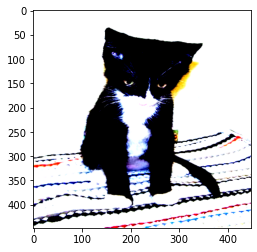

Label: cat


In [27]:
# Display image and label.
samples = next(iter(train_dataloader))
img = samples["image"][0].squeeze().permute(1, 2, 0)
label = samples["label"][0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [41]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(7, 7)),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(5, 5)),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(7, 7), stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(5, 5)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=5),
            nn.Flatten(),
            #nn.Linear(59168, 1)
        )

    def forward(self, x):
        return self.net(x)
        #return torch.sigmoid(self.net(x)).view(-1)

In [42]:
NN()(torch.zeros(2, 3, 448, 448)).shape

torch.Size([2, 4000])

## Let's just use already pretrained model

In [54]:
import torchvision.models as models
resnet18 = models.resnet18()

In [55]:
resnet18(torch.zeros(2, 3, 448, 448)).shape

torch.Size([2, 1000])

In [62]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.backbone = models.resnet18(pretrained=True)
        self.linear = nn.Linear(1000, 1)
        
        for param in self.backbone.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = self.backbone(x)
        x = F.relu(x)
        x = self.linear(x)
        return torch.sigmoid(x).view(-1)

In [63]:
NN()(torch.zeros(2, 3, 448, 448)).shape

torch.Size([2])

In [66]:
for param in NN().parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
